<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_ML_con_Python/blob/master/Regressione_NL_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT GENERAL LIBRARIES

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 

# IMPORT DATA FROM EXTERNAL SOURCE

INPUT DATASET
   Superficie   Prezzo
0          60   338611
1          70   655033
2         140  5697001
3         150  7011305
4          79   534887
Dimensione: (108, 2) 

Dimensione features vectors (108,) 
Dimensione output (108,)


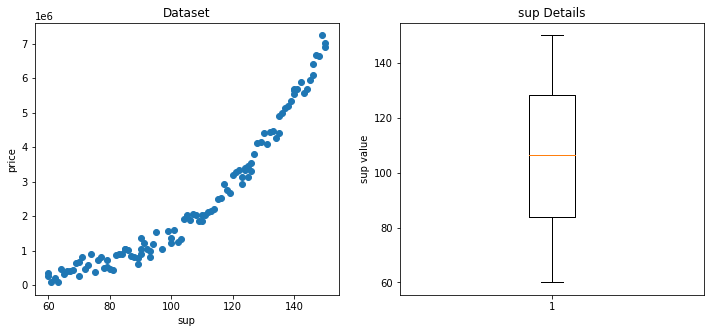

In [33]:

path='https://raw.githubusercontent.com/MatteoGandetto/Corso_ML_con_Python/master/Regressione_Polinomiale_IN.csv'
INPUT_df=pd.read_csv(path)

print('INPUT DATASET')
print(INPUT_df.head())
print('Dimensione:',INPUT_df.shape,'\n')

#remove all NaN
# 0 -> rows
# 1 -> columns
INPUT_df=INPUT_df.dropna(1,'all')
INPUT_df=INPUT_df.dropna(0,'all')


#convert to NumPy array
np_IN=np.array(INPUT_df)
np_IN_X=np_IN[:,0]
np_IN_y=np_IN[:,1]
print('Dimensione features vectors',np_IN_X.shape,'\nDimensione output',np_IN_y.shape)

#plot data
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,5)

axs[0].scatter(np_IN_X, np_IN_y)
axs[0].set_xlabel('sup')
axs[0].set_ylabel('price')
axs[0].set_title('Dataset')

axs[1].boxplot(np_IN_X)
axs[1].set_ylabel('sup value')
axs[1].set_title('sup Details')
fig.show()

# LIBRARIES FOR MACHINE LEARNING

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# DATA PRE-PROCESSING

In [0]:
# split dataset in training part and test part
# if train_size and test_size are not defined,the train_size=0.7 and test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(np_IN_X,np_IN_y,test_size=0.3)


# SIMPLE LINEAR SOLUTION

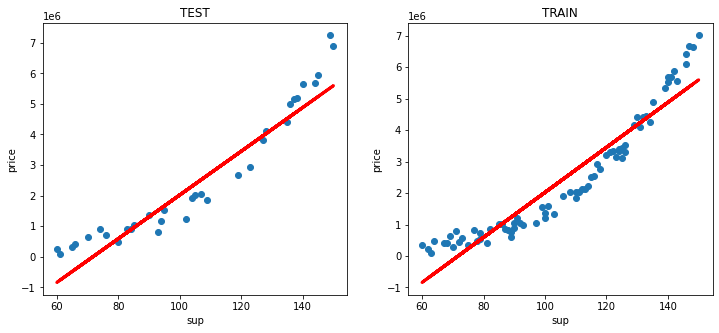

In [36]:
#reshape features to be used with LinearRegression's methods
X_train_r=np.reshape(X_train,(-1, 1))
X_test_r=np.reshape(X_test,(-1, 1))
X_all=np.reshape(np_IN_X,(-1,1))

#train the linear regressor
reg = LinearRegression().fit(X_train_r, y_train)

#y_pred is a linear prediction of X_test
y_pred_test=reg.predict(X_test_r)
y_pred_train=reg.predict(X_train_r)

#show the solution
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,5)


axs[0].set_xlabel('sup')
axs[0].set_ylabel('price')
axs[0].set_title('TEST')
axs[0].scatter(X_test,y_test)
axs[0].plot(X_test,y_pred_test,c='red',linewidth=3)

axs[1].set_title('TRAIN')
axs[1].set_xlabel('sup')
axs[1].set_ylabel('price')
axs[1].scatter(X_train,y_train)
axs[1].plot(X_train,y_pred_train,c='red',linewidth=3)

fig.show()

# SUPPORT VECTOR REGRESSION SOLUTION

######################
 RBF MODEL
TEST
R^2= -0.06748677942977266 
MSE= 4922451953741.061523 

TRAIN
R^2= -0.04995026654527446 
MSE= 3978860638504.879395 
######################

######################
 Linear MODEL
TEST
R^2= -0.027655212116257877 
MSE= 4738778506798.969727 

TRAIN
R^2= -0.009773420041781389 
MSE= 3826607643076.826660 
######################

######################
 Polynomial MODEL
TEST
R^2= 0.9649229664482639 
MSE= 161749087356.770966 

TRAIN
R^2= 0.9676025023641865 
MSE= 122772603842.788467 
######################



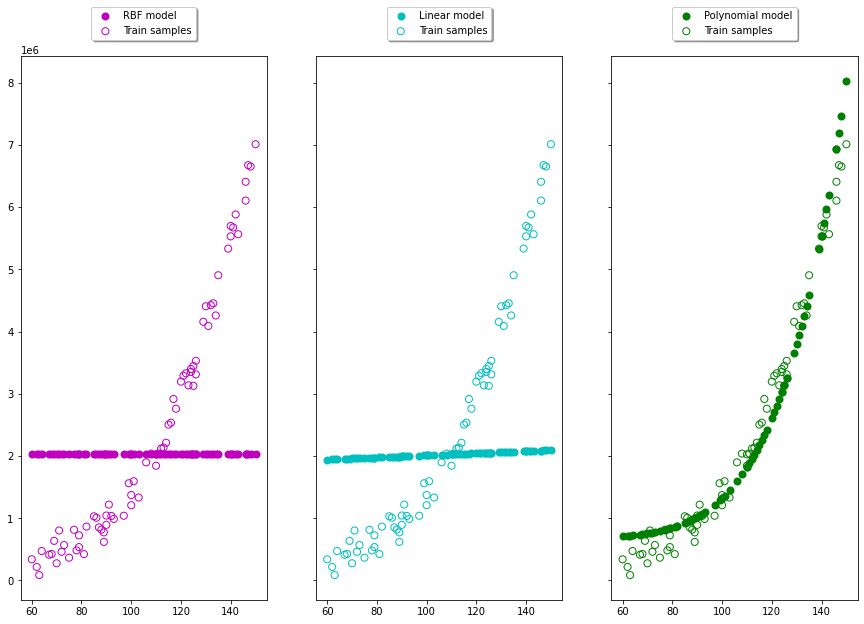

In [41]:
# import library
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly', degree=6)


svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']


fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)
for ind, svr in enumerate(svrs):
    svr.fit(X_train_r, y_train)
    axes[ind].scatter(X_train_r, svr.predict(X_train_r), color=model_color[ind], lw=2,
                  label='{} model'.format(kernel_label[ind]))
    axes[ind].scatter(X_train_r,y_train,facecolor="none",
                     edgecolor=model_color[ind], s=50,
                     label='Train samples')
    axes[ind].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)
    R2_test=svr.score(X_test_r,y_test)
    MSE_test = mean_squared_error(y_test,svr.predict(X_test_r))
    R2_train=svr.score(X_train_r,y_train)
    MSE_train = mean_squared_error(y_train,svr.predict(X_train_r))
    
    print ('######################\n',kernel_label[ind], 'MODEL', )
    print ('TEST\nR^2=',R2_test,'\nMSE= %f \n'% MSE_test)
    print ('TRAIN\nR^2=',R2_train,'\nMSE= %f '% MSE_train)
    print ('######################\n')


